# Présentation du projet 5B1C

iReaz est un créateur de contenu sur Youtube spécialisé dans le jeu League of Legends (abrégé LoL) qui s'est un jour posé une question intéressante : "Est-ce qu'un joueur de niveau Challenger pourrait vaincre, à lui seul, 5 joueurs débutants dans une partie classique de LoL ?". Pour y répondre, il a organisé une série de vidéos intitulée "1 Challenger contre 5 Bronzes" où des quintettes de joueurs, classés Bronze, ont affronté des joueurs Challenger dans des parties classiques. Cette série de vidéos est disponible sur Youtube à l'adresse suivante : https://www.youtube.com/playlist?list=PLg9Rno9Ks-fPMNRjuxAt9YbFAL8--NEij.

Avant le lancement du défi, tout portait à croire que les Challengers gagneraient le défi relativement facilement, étant donné qu'il s'agit des meilleurs joueurs du jeu. Cependant, après de nombreuses vidéos, il est démontré que ce défi est en réalité très complexe et demande une précision de jeu quasi parfaite. Bien que débutants, les 5 joueurs, grâce à leur supériorité numérique, ont une plus grande facilité à dominer la carte, collecter des ressources et les utiliser contre le Challenger. Aussi, un combat à 1 contre 5 est très difficile à gagner sur LoL et il faut user de stratégies complexes pour parvenir à remporter ces combats.

5B1C (abréviation de 5 Bronzes 1 Challenger) est un projet qui vise à analyser les parties de LoL de cette série de vidéo pour en tirer des informations intéressantes permettant de faciliter la réussite de ce challenge. Plusieurs questions vont trouver une réponse ici, comme par exemple : 
- Quel est le nombre maximal de morts qu'un Challenger peut subir avant de rendre ce défi presque impossible à gagner ?
- Quel est le nombre optimal de creeps par minutes (CS/min) à farmer pour avoir une bonne entrée d'or tout au long de la partie ?
- Quelle est la meilleure stratégie pour atteindre le Nexus ennemi ?
Et autres.

Pour répondre à ces questions, deux catalogues ont été créés et contiennent 6 parties victorieuses et 11 perdantes (du point de vue du Challenger). 

Les résultats de l'analyse sont disponibles dans la partie conclusion, tout en bas de cette page.

# Importation des catalogues

L'analyse commence dès maintenant par l'importation des librairies nécessaires.

In [1]:
## Librairies externes à Python
import pandas as pd

## Librairies faites pour cette étude
import librarie as lib

## Paramètres d'affichage des catalogues de données
lib.display_parameters(pd)

Les deux catalogues vont être importés à savoir, celui contenant les parties victorieuses et celui contenant les parties perdantes.

In [18]:
## Importation des deux catalogues
victoire = pd.read_csv("donnees/victoire.csv")
defaite = pd.read_csv("donnees/defaite.csv")

## Transformer en liste Python les ensembles de données dans les colonnes des catalogues
list_columns = ["Temps numérique", "Temps numérique objets", "Kill", "Mort", "CS", "Temps objets", "Objets"]
victoire, defaite = lib.repair_list_in_df(victoire, defaite, list_columns)

Dans ces deux catalogues, de nombreuses colonnes sont disponibles et contiennent diverses informations sur les parties à analyser, à savoir :
- Le nom du joueur réalisant le défi
- Son élo
- La durée de la partie
- Son KDA à la fin de la partie
- Le nombre de tours perdus
- Le nombre d'inhibiteurs perdus
- Le nombre de tours détruits par le joueur
- Le nombre d'inhibiteurs détruits par le joueur
- Les CS/min moyen à la fin de la partie
- Le nombre d'or total
- Le gold/min moyen à la fin de la partie
- Le temps de la première mort (du joueur ou des adversaires)
- Le nombre de kills évoluant au fil de la partie (un échantillon prélevé toutes les 2 minutes 30 de 0 jusqu'à la fin de la partie)
- Le nombre de morts évoluant au fil de la partie (un échantillon prélevé toutes les 2 minutes 30 de 0 jusqu'à la fin de la partie)
- Le nombre de CS évoluant au fil de la partie (un échantillon prélevé toutes les 2 minutes 30 de 0 jusqu'à la fin de la partie)
- Le nombre de personnages avec des contrôles de foule
- Le summoner 1	du joueur
- Le summoner 2	du joueur
- Le temps d'obtention des objets.

Et d'autres colonnes pour faciliter les calculs et la conversion des durées en durée numérique.

Pour exemple, ouvrons la première ligne du catalogue contenant les parties gagnantes :

In [19]:
## Voici à quoi ressemble les données dans le catalogue
victoire.head(1)

,Numéro,Nom du joueur,Elo,Champion,Durée de la partie,Vrai temps,KDA,Nombre de tours perdues,Nombre d'inibiteur perdus,Nombres de tours détruite,Nombre d'inibiteur détruit,Cs/min,Gold total,Gold/min,Temps première mort,Temps numérique première mort,Qui a eu la première mort ?,Temps,Temps numérique,Kill,Mort,CS,Gold/m,Nombre de perso à CC,Summoner 1,Summoner 2,Temps objets,Temps numérique objets,Objets,Hérald pris ?,Dragon,Source,Soul,CS_final
0,Game 1,Dark inugami,Challenger,Yasuo,00:20,20.216667,13.5,4,0,9,1,11.129431,22163,1096,00:06:51,6.85,1,"[00:00:00, 00:02:30, 00:05:00, 00:07:30, 00:10:00, 00:12:30, 00:15:00, 00:17:30, 00:20:00]","[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]","[0, 0, 2, 3, 8, 10, 15, 19, 27]","[0, 0, 0, 1, 1, 2, 2, 2, 2]","[0, 12, 42, 66, 96, 134, 165, 201, 225]",1095,4,Flash,TP,"[00:03:35,00:09:10,00:12:12,00:13:59,00:16:19,00:19:18,00:19:18]","[3.58, 9.17, 12.2, 13.98, 16.32, 19.3, 19.3]","[Botte, 1er item, 2nd item, 3ème item, 4ème item, 5ème item, 6ème item]",?,0,https://www.youtube.com/watch?v=dBZy-SPi3SE&list=PL4aZl1fLxWKyT0hfBxslaiDuNVSZdNVUA&index=14,0,225


Maintenant que les catalogues sont importés, la comparaison entre les données peut commencer.

# Début de l'analyse

Pour commencer, l'or total moyen collecté entre les parties gagnantes et perdantes est comparé.

In [4]:
print("Or total moyen des parties victorieuses :", victoire["Gold total"].mean())
print("Or total moyen des parties perdantes :", defaite["Gold total"].mean())
print("Ecart d'or total moyen entre les parties victorieuses et perdantes :", victoire["Gold total"].mean() - defaite["Gold total"].mean())

Or total moyen des parties victorieuses : 22049.5
Or total moyen des parties perdantes : 13952.25
Ecart d'or total moyen entre les parties victorieuses et perdantes : 8097.25


Il est possible de constater un écart gigantesque d'environ 8100 pièces d'or. Etudier cet écart et le comprendre pourrait permettre de développer des stratégies pour l'atténuer et donc augmenter l'apport en or durant une partie.

Aussi, il est possible de comparer l'or par minute moyen entre les parties gagnantes et perdantes.

In [5]:
print("Or/min moyen des parties victorieuses :", victoire["Gold/min"].mean())
print("Or/min moyen des parties perdantes :", defaite["Gold/min"].mean())
print("Ecart d'or/min moyen entre les parties victorieuses et perdantes :", victoire["Gold/min"].mean() - defaite["Gold/min"].mean())

Or/min moyen des parties victorieuses : 962.5
Or/min moyen des parties perdantes : 571.875
Ecart d'or/min moyen entre les parties victorieuses et perdantes : 390.625


Il est donc aussi possible de constater que l'or par minute des parties gagnantes est très clairement au-dessus de celui des parties perdantes d'environ 400 or par minute, ce qui constitue une différence énorme dans LoL.

Essayons de comprendre cet écart en étudiant tout les moyens possible dans le jeu pour obtenir de l'or, à savoir en tuant des joueurs, des creeps ou en détruisant des structures.

Commençons par comparer l'évolution des kills obtenus dans toutes les parties (victorieuses et perdantes). Pour faciliter l'observation des résultats, toutes les parties victorieuses vont être situées dans une zone en vert et toutes les parties perdantes, dans une zone en rouge. Les moyennes de ces zones vont aussi être affichées.

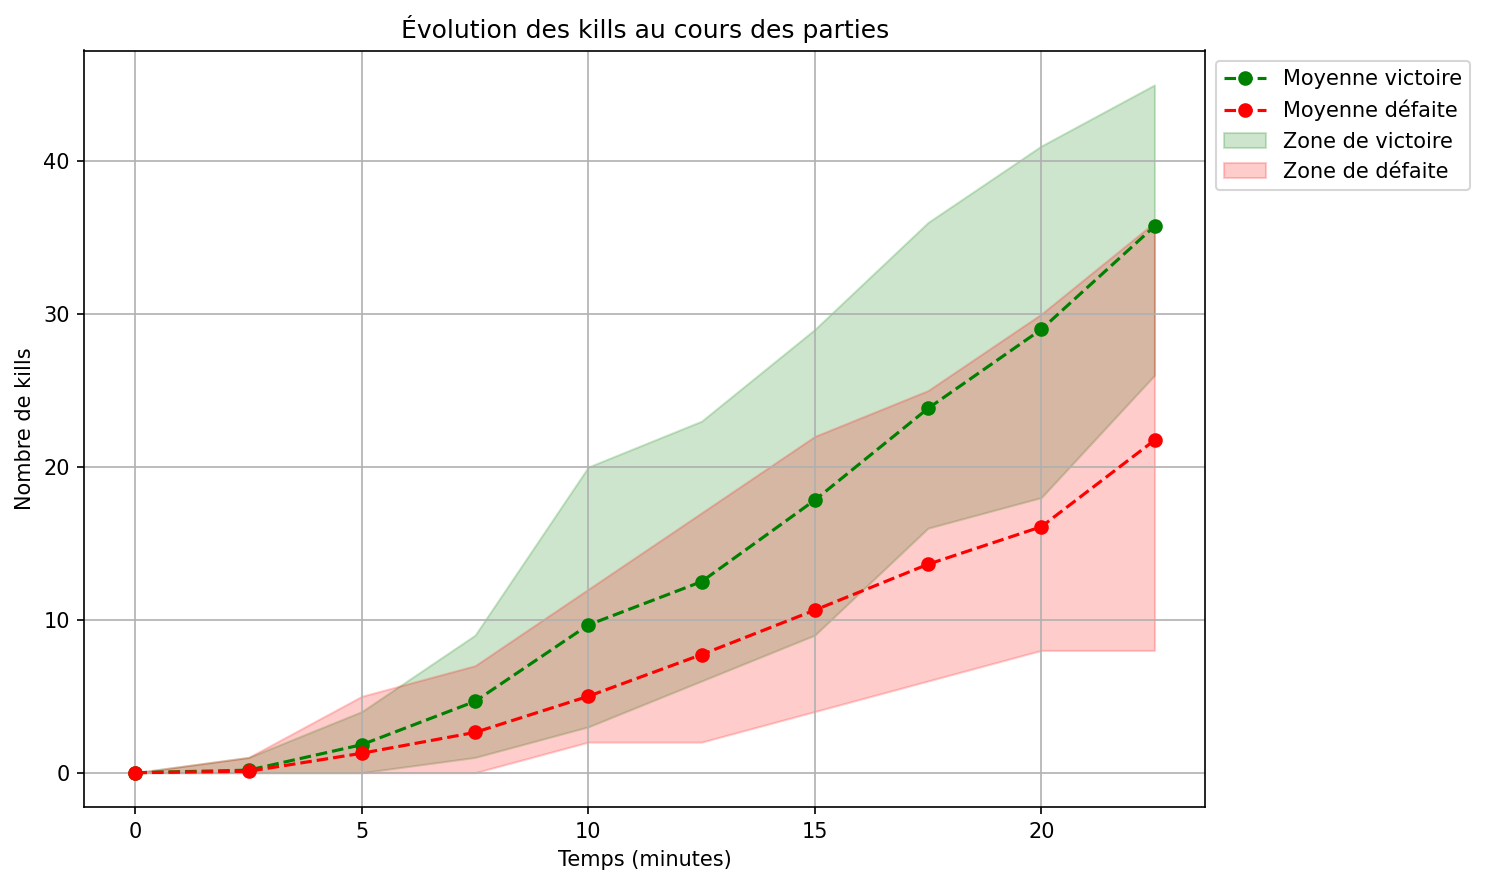

In [20]:
lib.plot_colonnes(victoire, defaite, "Temps numérique", "Kill", 'Nombre de kills', 'Évolution des kills au cours des parties', plot_games = False)

Plusieurs informations peuvent être extraites :
- Tout d'abord, il est possible de constater que, dans les parties gagnantes, le nombre de kills moyen par minute est toujours plus élevé que dans les parties perdantes. Pour avoir un revenu intéressant d'or, il faut donc tuer un maximum de joueurs étant donné que cela apporte une quantité d'or importante. Ceci peut expliquer en grande partie la différence d'or/min moyen des parties gagnantes et perdantes vue précédemment.
- Pour maximiser ses chances de réussir ce défi, il faudrait avoir un nombre de kill moyen égal à celui de la moyenne des parties gagnantes. Cela signifie qu'il faut avoir environ 2 kills vers 5 minutes de jeu, 10 kills vers 10 minutes de jeu, 18 kills vers 15 minutes de jeu et 29 kills vers 20 minutes de jeu. Cela devrait permettre d'obtenir un apport en or suffisamment intéressant pour pouvoir réussir le défi.
- Vers 5 minutes de jeu, il est possible de constater une moyenne de 1.8 kill. Stratégiquement, pour réussir à les obtenir, il serait intéressant de se diriger vers la botlane et d'essayer de tuer le duo d'en face.

Observons maintenant l'évolution des CS obtenus dans toutes les parties (victorieuses et perdantes) ainsi que le CS/min moyen.

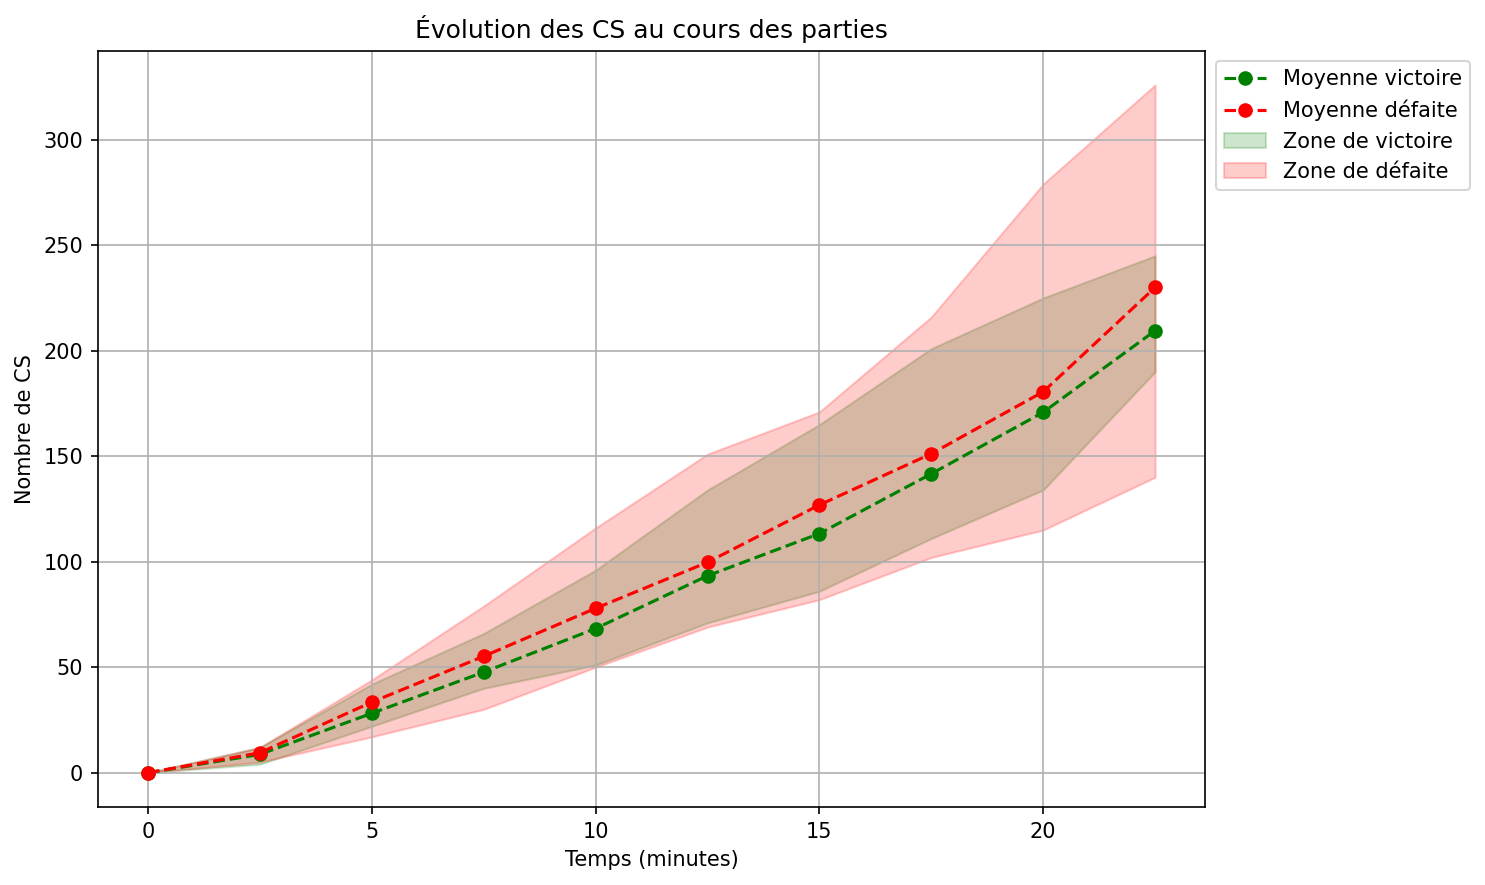

In [7]:
lib.plot_colonnes(victoire, defaite, "Temps numérique", "CS", 'Nombre de CS', 'Évolution des CS au cours des parties', plot_games = False)

In [21]:
print("CS/min moyen des parties victorieuses :", victoire["Cs/min"].mean())
print("CS/min moyen des parties perdantes :", defaite["Cs/min"].mean())
print("Ecart de CS/min moyen entre les parties victorieuses et perdantes :", victoire["Cs/min"].mean() - defaite["Cs/min"].mean())

Cs/min moyen des parties victorieuses : 9.698057706666667
Cs/min moyen des parties perdantes : 9.57134782590909
Ecart de Cs/min moyen entre les parties victorieuses et perdantes : 0.12670988075757705


Plusieurs informations peuvent être extraites de la figure et de l'écart de CS/min moyen entre les parties :
- Il est possible de constater sur la figure que la moyenne du nombre de CS des parties gagnantes et perdantes est très proche bien que celle des parties gagnantes semble légèrement inférieure. Il est possible d'en déduire que farmer des creeps est important, mais ne semble pas être une condition majeure pour réussir le défi étant donné que la moyenne des parties perdantes est supérieure aux parties gagnantes. Cela signifie qu'il est plus intéressant de se concentrer sur la collecte d'or par d'autres moyens (tuer des joueurs ou détruire des structures) que farmer.
- Le faible écart entre les deux moyennes de CS/min des parties gagnantes et perdantes confirme que farmer n'est pas une condition de victoire majeure. Il est important et nécessaire de farmer correctement pour avoir un revenu en or intéressant mais il est préférable de se concentrer sur d'autres sources de revenu.
- En moyenne, pour avoir un revenu intéressant en or avec le farming et augmenter ses chances de réussir le défi, il faut tuer environ 9.7 creeps par minute.

Maintenant, étudions une autre façon d'obtenir de l'or : détruire des structures adversaires

Deux types de structures peuvent être détruites pour apporter de l'or dans le jeu à savoir les tourelles (abrégées en tours) et les inhibiteurs.

In [23]:
print("Nombre de tours détruites moyens des parties victorieuses :", victoire["Nombres de tours détruite"].mean())
print("Nombre de tours détruites moyens des parties perdantes :", defaite["Nombres de tours détruite"].mean())
print("Ecart de tours détruite moyen entre les parties victorieuses et perdantes :", victoire["Nombres de tours détruite"].mean() - defaite["Nombres de tours détruite"].mean())

Nombre de tours détruites moyens des parties victorieuses : 6.5
Nombre de tours détruites moyens des parties perdantes : 1.0909090909090908
Ecart de tours détruite moyen entre les parties victorieuses et perdantes : 5.409090909090909


Plusieurs informations peuvent être extraites de ces données :
- Tout d'abord, il est possible de constater un grand écart entre le nombre de tours détruits pour les parties gagnantes et perdantes. Ceci aide à expliquer la différence d'or/min moyen entre les parties gagnantes et perdantes.
- Il semblerait que pour mener à bien le défi, il faut détruire environ 6 à 7 tours. Or, pour atteindre le Nexus ennemi en passant par une lane, il faut détruire 5 tours. Cela signifie qu'il est préférable stratégiquement de se concentrer sur la destruction d'une seule lane et de seulement détruire les premières tours des autres lanes.
- Pour gagner, il faut en moyenne détruire 6.5 tours et pour arriver au Nexus, il faut détruire 5 tours. Une stratégie qui pourrait être intéressante à développer est de se concentrer sur la destruction des 3 premières tours sur la carte pour, à la fois, récupérer des plates mais aussi tenter de détruire une de ces tours. Passé 14 minutes, les plates disparaissent et c'est à ce moment-là qu'il faut accentuer son push sur une seule lane pour parvenir au Nexus adversaire.
- La botlane semble être un cas intéressant pour accentuer son push. Etant donné que les joueurs sont deux, cela permettrait de récupérer plus de kills surtout si le jungler adversaire vient gank. Aussi, la protection contre les dégâts n'est pas en bot donc plus facile pour push dès le départ. Et ça empêche aussi les roaming du top vers le bot.
- Etant donné que la destruction des tourelles est une condition très importante pour réussir le défi, il faut donc jouer un personnage qui a la capacité de détruire rapidement des tourelles. Il est donc conseillé de jouer des personnages bruiser, avec la capacité de split push ou des personnages avec un build bruiser plutôt que des mages.

Observons maintenant les résultats obtenus avec la destruction des inhibiteurs.

In [10]:
print("Nombre d'inhibiteurs détruits moyen des parties victorieuses :", victoire["Nombre d'inibiteur détruit"].mean())
print("Nombre d'inhibiteurs détruits moyen des parties perdantes :", defaite["Nombre d'inibiteur détruit"].mean())

Nombre d'inibiteur détruit moyen des parties victorieuses : 1.0
Nombre d'inibiteur détruit moyen des parties perdantes : 0.2727272727272727


Le résultat obtenu va dans le sens des explications précédentes. Cela souligne le fait qu'il vaut mieux accentuer son push sur une seule lane et donc détruire un seul inhibiteur au passage.

Maintenant que nous avons vu les différents moyens pour obtenir de l'or, à quoi va servir cet or ? Dans LoL, il est possible de gagner des statistiques en montant de niveau, mais aussi en achetant des objets à la boutique. Ces objets constituent la clé pour gagner ce défi. Plus un objet est acheté tôt dans le jeu, plus le défi va devenir réalisable. Comparons le temps moyen d'arrivée des objets entre les parties gagnantes et perdantes.

Impossible d'afficher les zones !!


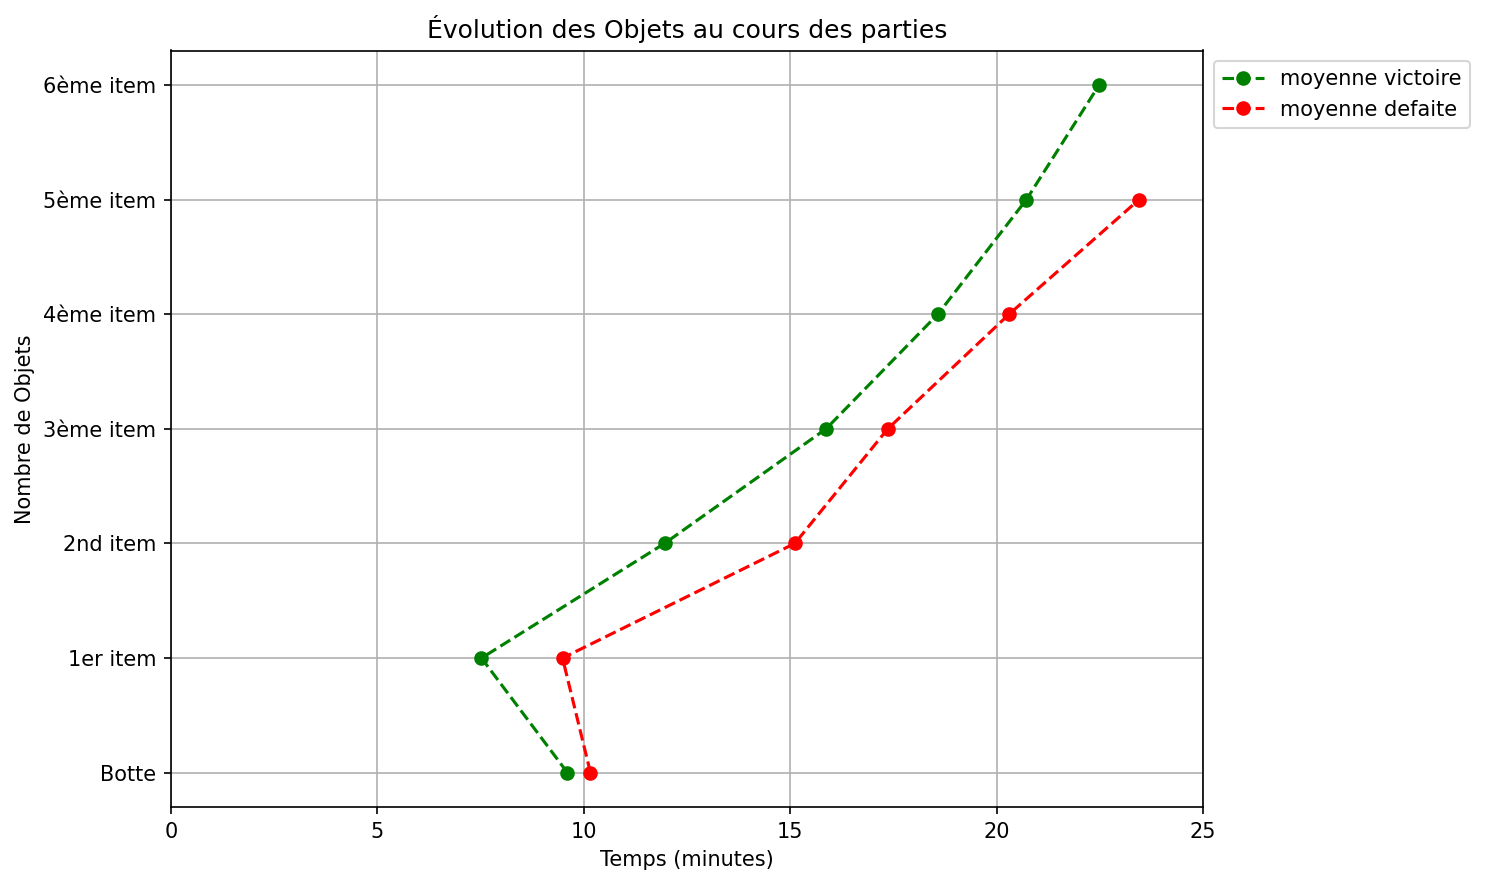

In [11]:
df_with_mean_y_vict = lib.plot_colonnes(victoire, defaite, "Temps numérique objets", "Objets", 'Nombre de Objets', 'Évolution des Objets au cours des parties', plot_games = False,  plot_xlim = True)

Plusieurs informations peuvent être extraites de ce graphique :
- Tout d'abord, la moyenne de temps d'obtention des items est très nettement supérieure du côté des parties gagnantes que perdantes, ce qui était attendu. 
- Pour réussir le défi, d'après la moyenne de temps d'obtention des items des parties gagnantes, il faut réussir à acheter son 1er item vers 8 minutes de jeu, son 2nd vers 12 minutes, son 3ème vers 16 minutes, son 4ème vers 18 minutes 30, son 5ème vers 21 minutes et son dernier vers 22 minutes 30. Les bottes doivent être complétées vers 10 minutes de jeu.
- Il semble préférable d'acheter tout d'abord son 1er item plutôt que compléter ses bottes.
- Parvenir à l'achat d'un 6ème item semble aider à réussir le défi

Ce graphique montre l'importance d'acquérir de l'or rapidement en début de partie. Il faut donc prendre des risques assez tôt dans la partie pour pouvoir acquérir de l'or rapidement. Parlons justement des prises de risques à prendre pour réussir ce défi et les limites à ne pas dépasser sous peine d'échec. Commençons par observer l'évolution du nombre de morts des challengers dans les parties gagnantes et perdantes.

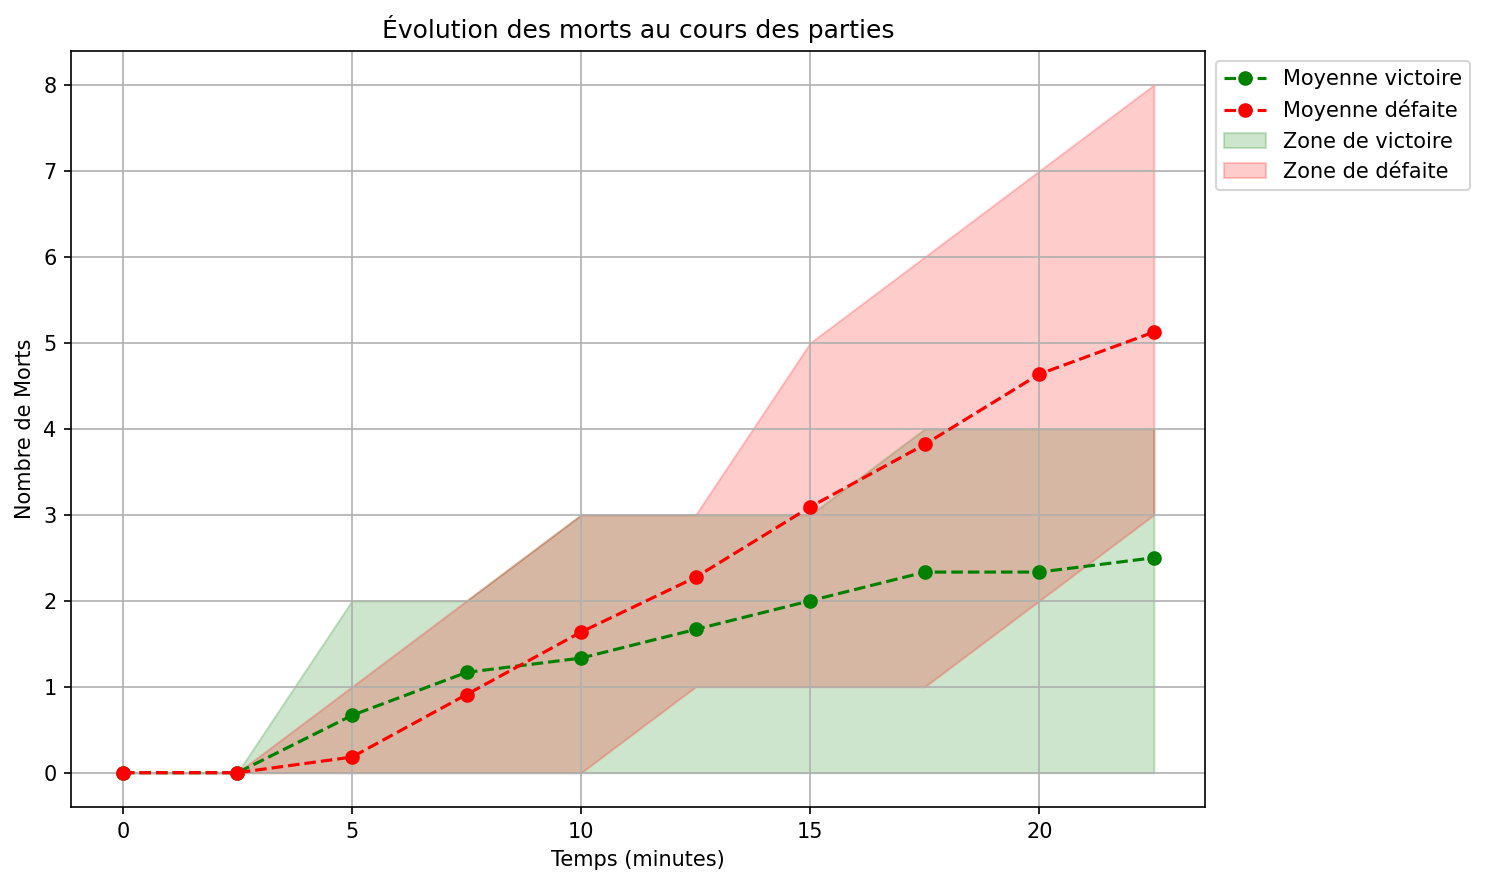

In [12]:
df_with_mean_y_vict_4 = lib.plot_colonnes(victoire, defaite, "Temps numérique", "Mort", 'Nombre de Morts', 'Évolution des morts au cours des parties', plot_games = False)

Plusieurs informations peuvent être extraites de cette figure : 
- Tout d'abord, il est possible de constater que les moyennes se croisent. Entre 2 minutes 30 et 7 minutes 30, la moyenne du nombre de morts des parties gagnantes est supérieure à celle des parties perdantes. Ceci s'inverse ensuite et il est possible de constater que la moyenne des parties perdantes devient très nettement supérieure à celle des parties gagnantes. Ceci peut s'expliquer par le fait qu'il est intéressant de prendre des risques dès le début de la partie (avant 7 minutes 30 de jeu) pour tenter d'obtenir des kills ou commencer à détruire des structures pour acquérir de l'or. Si cette prise de risque finit par la mort du Challenger, le défi n'est pas échoué car au début d'une partie, le chrono de réapparition des joueurs n'est pas très long et les joueurs débutants n'ont pas encore la capacité de détruire des tours pour accéder à la base du Challenger. Prendre des risques est conseillé en début d'une partie. Il est possible de mourir une seule fois avant 10 minutes de jeu.
- En avançant dans la partie, il est possible de mourir une seconde fois vers 15 minutes de jeu et de toujours réussir le défi. Cependant, plusieurs conditions s'imposent pour que cette mort ne soit pas trop pénalisante à savoir : cette mort doit être accompagnée d'une grande collection d'or (prise d'une tourelle ou plusieurs kills), les tourelles alliées ne doivent pas être toutes détruite et il ne doit pas rester trop de joueurs ennemis vivants pour qu'ils ne puissent pas faire un push de malade. Aussi, il est important de noter qu'il est très important que les morts soient bien espacés dans le temps car, trop proche, cela entraînerait une trop longue absence d'or et pourrait créer un retard irrécupérable.
- Il est éventuellement possible de mourir une troisième fois passé 17 minutes 30. Si les conditions évoquées précédemment sont respectées et que le Challenger possède une grande avance sur les ennemis, cela ne devrait pas entraîner un échec du défi.
- En regardant la moyenne de l'évolution des morts pour les parties perdantes, il est possible de constater que mourir 5 fois ou plus rend le défi impossible à remporter.
- Il vaut mieux éviter de mourir même s'il est possible de faire des erreurs si elles s'accompagnent d'une forte entrée en or. Il est possible de mourir si tous les joueurs en face sont déjà morts si cela permet de récupérer des objectifs et de l'or.

Le KDA (ou juste KD dans le cas de cette analyse étant donné que les Challengers ne peuvent pas avoir d'assistance) moyen des parties victorieuses et perdantes permet de valider les explications précédentes.

In [13]:
print("KD moyen des parties victorieuses :", victoire["KDA"].mean())
print("KD moyen des parties perdantes :", defaite["KDA"].mean())
print("Ecart du KD moyen entre les parties victorieuses et perdantes :", victoire["KDA"].mean() - defaite["KDA"].mean())

KD moyen des parties victorieuses : 17.166666666666668
KD moyen des parties perdantes : 4.1571428571428575
Ecart du KD moyen entre les parties victorieuses et perdantes : 13.00952380952381


La différence de KD entre les deux types de partie est d'environ 13. Cette différence est énorme et appuie bien le fait qu'il ne faut pas trop mourir pour réussir ce défi. Il faut aussi tuer beaucoup de joueurs pour pouvoir obtenir suffisamment d'or pour acheter des objets rapidement et réussir le défi.

Pour accentuer l'analyse sur la prise de risque à prendre pour réussir le défi, observons le temps moyen de la première mort du Challenger entre les parties gagnantes et perdantes.

In [14]:
print("Temps première mort moyen des parties victorieuses :", victoire["Temps numérique première mort"].mean())
print("Temps première mort moyen des parties perdantes :", defaite["Temps numérique première mort"].mean())
print("Ecart du temps moyen de la première mort entre les parties victorieuses et perdantes :", defaite["Temps numérique première mort"].mean() - victoire["Temps numérique première mort"].mean())

Temps première mort moyen des parties victorieuses : 4.944
Temps première mort moyen des parties perdantes : 6.113636363636363
Ecart du temps moyen de la première mort entre les parties victorieuses et perdantes : 1.1696363636363634


Il est possible de constater que le Challenger meurt plus tôt dans les parties gagnantes que perdantes. Ceci est une information intéressante et démontre que prendre des prises de risque tôt dans une partie est intéressant pour pouvoir générer de l'or tôt dans la partie. Il est donc conseillé de prendre des risques quitte à mourir pour acquérir de l'or rapidement.

Ensuite, il est possible de discuter des conditions d'échec du défi. Nous avons vu précédemment qu'un trop grand nombre de morts peut entraîner un échec. Cependant, il est important qu'une trop grande destruction de structures alliées peut aussi entraîner un échec du défi. Voyons cela en comparant le nombre moyen de structures perdu des deux types de parties.

In [15]:
print("Nombre de tours perdues moyen des parties victorieuses :", victoire["Nombre de tours perdues"].mean())
print("Nombre de tours perdues moyen des parties perdantes :", defaite["Nombre de tours perdues"].mean())
print("Ecart du nombre moyen de tours perdues entre les parties victorieuses et perdantes :", defaite["Nombre de tours perdues"].mean() - victoire["Nombre de tours perdues"].mean())

Nombre de tours perdues moyen des parties victorieuses : 6.666666666666667
Nombre de tours perdues moyen des parties perdantes : 10.090909090909092
Ecart du nombre moyen de tours perdues entre les parties victorieuses et perdantes : 3.4242424242424248


Dans ce défi, il est très difficile voire impossible de protéger toutes les tours seul. Il est donc obligatoire d'en perdre quelques-unes et cela n'entraîne pas un échec du défi. Il faut cependant faire attention à ne pas en perdre trop. D'après les résultats, il est possible d'en perdre environ 7 et de réussir le défi. Cependant, en perdre 10 semble entraîner un échec du défi. Pour mieux comprendre pourquoi, regardons le nombre moyen d'inhibiteurs perdus dans les parties gagnantes et perdantes.

In [16]:
print("Nombre d'inibiteur perdus moyen des parties victorieuses :", victoire["Nombre d'inibiteur perdus"].mean())
print("Nombre d'inibiteur perdus moyen des parties perdantes :", defaite["Nombre d'inibiteur perdus"].mean())
print("Ecart du nombre moyen d'inibiteur perdues entre les parties victorieuses et perdantes :", defaite["Nombre d'inibiteur perdus"].mean() - victoire["Nombre d'inibiteur perdus"].mean())

Nombre d'inibiteur perdus moyen des parties victorieuses : 1.0
Nombre d'inibiteur perdus moyen des parties perdantes : 2.1818181818181817
Ecart du nombre moyen d'inibiteur perdues entre les parties victorieuses et perdantes : 1.1818181818181817


Du côté des inhibiteurs, il est possible d'en perdre un seul et de toujours réussir le défi. Cependant, en perdre 2 ou + semblent rendre le défi trop compliqué à réussir. En effet, il est beaucoup plus facile de gérer la gestion de la perte d'un seul inhibiteur que de deux. L'arrivée des méga-sbires peut compliquer grandement la réussite du challenge sur plusieurs lanes. Perdre des tours ne semble pas être trop pénalisant mais il faut néanmoins protéger au maximum les inhibiteurs qui peuvent être une condition d'échec du défi s'ils sont tous détruits.

Enfin, il est possible de comparer la durée moyenne des parties gagnantes ou perdantes.

In [17]:
print("Durée moyenne des parties victorieuses :", victoire["Vrai temps"].mean())
print("Durée moyenne des parties perdantes :", defaite["Vrai temps"].mean())

Durée moyenne des parties victorieuses : 23.194444445000002
Durée moyenne des parties perdantes : 23.87727272636364


Il est possible de constater une faible différence entre les deux durées moyennes. Les parties perdantes semblent être plus longues, ce qui peut s'expliquer par le fait où les forces sont égales pendant une longue durée puis finissent par pencher du côté des joueurs Bronzes.

Pour réussir, il faut donc réussir à terminer la partie vers 23 minutes, sinon l'avantage créé par le joueur challenger va être rattrapé petit à petit. Les débutants vont rattraper le joueur challenger niveau item et être à son niveau avec des dégâts importants diffiles à ignorer entraînent l'échec du défi.

# Conclusion

L'analyse de cette étude est terminée. Il est temps de réunir tous les résultats et de tirer des conclusions permettant d'aider à la réussite de ce défi. Avant de commencer, je tiens tout de même à souligner de nouveau que ce challenge est, selon mon avis et les résultats de cette étude, très difficile et demande des connaissances de jeu très poussée. Il faut avoir une très bonne connaissance de son champion (ses mécaniques et de ces limites), avoir une bonne connaissance des possibilités des champions ennemis et une bonne connaissance de la carte de LoL. Faire une ou plusieurs erreurs dans ce défi peut entrainer un échec immédiat. Il est donc essentiel d'avoir déjà beaucoup d'expériences dans le jeu pour maximiser ces chances de réussite. Je ne dis pas que ce challenge est impossible pour les joueurs amateurs, mais il est conseillé de préparer une ou plusieurs stratégies si les connaissances du jeu ne sont pas maximales.

Avant de passer aux conclusions, je tiens à dire que cette analyse s'effectue sur un nombre réduit de parties et que pour avoir des résultats solides, il faudrait avoir un échantillons de 50 à 100 parties. Cependant, il est important de savoir que peu de personnes ont remportés ce défi (donc peu de parties sont disponibles) et extraire des données des parties est un processus qui peut être très long. Néanmoins, les résultats obtenus dans cette analyse sont intéressants mais ils doivent être pris avec des pincettes.

**Voici les conclusions :**
- Pour réussir le défi, il faut générer environ 950 or par minutes. Plusieurs moyens sont possibles pour parvenir à générer autant d'or. Certaines moyens doivent être plus appuyé que d'autres.
- Pour générer beaucoup d'or en tuant des joueurs, il faut essayer d'avoir 2 kills vers 5 minutes de jeu, 10 kills vers 10 minutes de jeu, 18 kills vers 15 minutes de jeu et 29 kills vers 20 minutes de jeu.
- Farmer est important et il faut en moyenne 9.7 creeps par minutes. Il ne faut pas trop se concentrer sur ce moyen pour générer de l'or mais plutôt sur l'obtention de kills ou la destruction de structures (plates et tours)
- Détruire 6 à 7 tours et 1 inibiteur permets de réussir le défi. Il n'est pas nécessaire d'en détruire davantage car il est préférable d'axer son push sur une seule lane.
- Il est préférable de commencer par acheter un item plutôt que compléter ces bottes.
- Il est possible de mourir 3 fois avec des grands intervalles de temps et de réussir le défi.
- Il est conseillé de prendre des risques en début de partie quitte à mourir pour commencer à générer beaucoup d'or.
- Mourir plus de 4 fois rend le défi quasi impossible.
- Perdre 1 inibiteur n'est pas grave et n'entraine pas forcément un échec du défi. En perdre 2 augmente les chances de perdre. En perdre 3 rend le défi impossible.
- Une partie doit durer le moins de temps possible, environ 23 minutes. 

**Stratégie de jeu :**

Voici une stratégie qui, selon moi, permettrait de maximiser les chances de victoire. Tout d'abord, après l'achat des items de départ, il est conseillé de commencer par farmer sur la midlane étant donné que c'est ici ou les creeps arrivent le plus vite. Je ne conseille pas de prendre de risque car parfois, les joueurs débutants peuvent s'amuser à tendre un piège et venir à 5 au milieu de la carte pour tuer le Challenger. Après quelques waves et après, si possible, avoir mis le midlaner ennemis dans une position peu favorable, il est conseillé de décaller sur la botlane. C'est à ce moment là qu'il faut prendre des risques pour essayer de tuer les deux joueurs d'en face et commencer à récupérer des golds, quitte à mourrir. Après cela, je pense qu'il est préférable d'axer son push sur la botlane. Etant donné que les joueurs sont deux sur cette lane, cela permets de récupérer plus de kills (avec possiblement la venue du jungler), de réduire la venue du toplaner et de prendre des plates plus facilement (étant donné que la protection des tourelles n'est pas appliquée sur la tour en botlane). Bien sûr, il faut aussi, de temps en temps, aller défendre les autres lanes pour éviter que les adversaires obtiennent des structures alliées trop tôt. Il est conseillé de prendre uniquement les plates et de ne pas insister davantage (c'est à dire de chercher à obtenir des tours) mais de plutôt se concentrer sur une seule lane jusqu'au Nexus.

Pour finir, je tiens à préciser que ceci est mon analyse personnelle des résultats. Elle peut contenir des erreurs, des imprécisions, des imperfections et vous pouvez aussi être totalement en désaccord avec ce que je dis. Si vous souhaitez en discuter, vous pouvez toujours me contacter sur Discord (mon nom d'utilisateur : thibot ; mon ID : 227126730567974912). Mon niveau est Emeraude sur LoL.

**Perspectives de l'analyse :**

- Compter les plates obtenus et voir si un nombre élevé influence le fil de la partie.
- Comparer les smummoners avec les parties gagnantes ou perdantes et voir si par exemple, une tp mène plus souvent à une victoire.